In [62]:
import os
import numpy as np
import pandas as pd
import csv
from pycaret.anomaly import *
from pycaret.datasets import get_data

# set this to the directory with the malicious pdf's
current_directory="/home/leahwhalen/Documents/ece_509/CyberSecPDFProject/"
os.chdir(current_directory)


# class that defines pdfs and operates on them
class PDFInformation:
    #attributes:
    # pdf - raw text of the pdf
    # pdf_as_str = divide pdf raw text into lines
    # pdf_objects = divide pdf into objects

    def __init__(self, pdf_dir):
        self.pdf = self.convert(pdf_dir)

    # converts pdf to plain text?
    def convert(self, pdf_dir):
        f = open(pdf_dir, "r")

        # creates the pdf_as_str attribute
        self.pdf_as_str = f.read()

        self.pdf_strings = self.pdf_as_str.split("\n")
        # print(self.pdf_strings[1] + "\n\n")
        # print(self.pdf_as_str)

        obj_indices = []
        temp_object = []
        pdf_objects = []
        in_object = 0

In [63]:
print(current_directory)
print(os.getcwd())

/home/leahwhalen/Documents/ece_509/CyberSecPDFProject/
/home/leahwhalen/Documents/ece_509/CyberSecPDFProject


In [83]:
# create the csv from the data
with open("pdf_csv.csv", "w") as csv_f:
    writer = csv.writer(csv_f)

    # add all the pdfs to arrays and convert them
    pdf_array = []
    headers = []
    for i in range(1, 11):
        # gets name of file and reads it in
        pdf_file_name = current_directory+"/Malicious_PFD_1/test"+str(i)+".pdf"
        pdf_name_short = "test"+str(i)+".pdf"

        # cut line by line
        f = open(pdf_file_name, "r")
        pdf_as_str = f.read()

        # encodes data into characters
        pdf_strings = pdf_as_str.split('/n')
        pdf_chars = list(pdf_as_str)
        pdf_numbers = []
        for character in pdf_chars:
            pdf_numbers.append(ord(character))
            # pdf_numbers.append(character)
        # print(pdf_numbers)

        # add headers to a list
        headers.append(pdf_name_short)

        # append for dataframe
        pdf_array.append(pdf_numbers)

        f.close()

    df = pd.DataFrame(pdf_array)
    df = df.transpose()
    dataset = df.set_axis(headers, axis='columns')
    print(df)
    # writer.writerows(pdf_array)
    csv_f.close()

         0     1     2     3     4     5     6     7     8     9
0     37.0  37.0  37.0  37.0  37.0  37.0  37.0  37.0  37.0  37.0
1     80.0  80.0  80.0  80.0  80.0  80.0  80.0  80.0  80.0  80.0
2     68.0  68.0  68.0  68.0  68.0  68.0  68.0  68.0  68.0  68.0
3     70.0  70.0  70.0  70.0  70.0  70.0  70.0  70.0  70.0  70.0
4     45.0  45.0  45.0  45.0  45.0  45.0  45.0  45.0  45.0  45.0
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
1171   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  37.0   NaN
1172   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  69.0   NaN
1173   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  79.0   NaN
1174   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  70.0   NaN
1175   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  10.0   NaN

[1176 rows x 10 columns]


In [84]:
print(dataset)

      test1.pdf  test2.pdf  test3.pdf  test4.pdf  test5.pdf  test6.pdf  \
0          37.0       37.0       37.0       37.0       37.0       37.0   
1          80.0       80.0       80.0       80.0       80.0       80.0   
2          68.0       68.0       68.0       68.0       68.0       68.0   
3          70.0       70.0       70.0       70.0       70.0       70.0   
4          45.0       45.0       45.0       45.0       45.0       45.0   
...         ...        ...        ...        ...        ...        ...   
1171        NaN        NaN        NaN        NaN        NaN        NaN   
1172        NaN        NaN        NaN        NaN        NaN        NaN   
1173        NaN        NaN        NaN        NaN        NaN        NaN   
1174        NaN        NaN        NaN        NaN        NaN        NaN   
1175        NaN        NaN        NaN        NaN        NaN        NaN   

      test7.pdf  test8.pdf  test9.pdf  test10.pdf  
0          37.0       37.0       37.0        37.0  
1      

In [85]:
chr(37)

'%'

In [87]:
blank_data = df.replace(np.nan, 32)
# blank_data = df.replace(None, ' ')

print(blank_data)

         0     1     2     3     4     5     6     7     8     9
0     37.0  37.0  37.0  37.0  37.0  37.0  37.0  37.0  37.0  37.0
1     80.0  80.0  80.0  80.0  80.0  80.0  80.0  80.0  80.0  80.0
2     68.0  68.0  68.0  68.0  68.0  68.0  68.0  68.0  68.0  68.0
3     70.0  70.0  70.0  70.0  70.0  70.0  70.0  70.0  70.0  70.0
4     45.0  45.0  45.0  45.0  45.0  45.0  45.0  45.0  45.0  45.0
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
1171  32.0  32.0  32.0  32.0  32.0  32.0  32.0  32.0  37.0  32.0
1172  32.0  32.0  32.0  32.0  32.0  32.0  32.0  32.0  69.0  32.0
1173  32.0  32.0  32.0  32.0  32.0  32.0  32.0  32.0  79.0  32.0
1174  32.0  32.0  32.0  32.0  32.0  32.0  32.0  32.0  70.0  32.0
1175  32.0  32.0  32.0  32.0  32.0  32.0  32.0  32.0  10.0  32.0

[1176 rows x 10 columns]


In [19]:
# data parsing
data = blank_data.sample(frac=0.95, random_state=786)
data_unseen = blank_data.drop(data.index)
    
print(data)
print(data_unseen)

          0      1     2      3      4      5      6      7      8      9
158    50.0  101.0  58.0  108.0   62.0   62.0   62.0   41.0  111.0  111.0
744   116.0   32.0  32.0   32.0   53.0   53.0   53.0   32.0   62.0   32.0
779    32.0   32.0  32.0   32.0   47.0   47.0   47.0  116.0   32.0   32.0
310    49.0   99.0  32.0   32.0  121.0  121.0  121.0   32.0   32.0   32.0
952    32.0   32.0  32.0   32.0   48.0   48.0   51.0   48.0   46.0   32.0
...     ...    ...   ...    ...    ...    ...    ...    ...    ...    ...
1076   32.0   32.0  32.0   32.0   32.0   62.0   10.0  102.0   48.0   32.0
225    48.0  100.0  32.0   32.0  115.0  115.0  115.0   48.0   32.0   32.0
1129   32.0   32.0  32.0   32.0   32.0   32.0   32.0   32.0  111.0   32.0
806    32.0   32.0  32.0   32.0   46.0  105.0  108.0   10.0   97.0   32.0
506    60.0   32.0  32.0   32.0   53.0   53.0   53.0   32.0   60.0   32.0

[1117 rows x 10 columns]
          0      1      2      3      4      5      6      7      8      9
5      49.0

In [20]:
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print(data)
print(data_unseen)

          0      1     2      3      4      5      6      7      8      9
0      50.0  101.0  58.0  108.0   62.0   62.0   62.0   41.0  111.0  111.0
1     116.0   32.0  32.0   32.0   53.0   53.0   53.0   32.0   62.0   32.0
2      32.0   32.0  32.0   32.0   47.0   47.0   47.0  116.0   32.0   32.0
3      49.0   99.0  32.0   32.0  121.0  121.0  121.0   32.0   32.0   32.0
4      32.0   32.0  32.0   32.0   48.0   48.0   51.0   48.0   46.0   32.0
...     ...    ...   ...    ...    ...    ...    ...    ...    ...    ...
1112   32.0   32.0  32.0   32.0   32.0   62.0   10.0  102.0   48.0   32.0
1113   48.0  100.0  32.0   32.0  115.0  115.0  115.0   48.0   32.0   32.0
1114   32.0   32.0  32.0   32.0   32.0   32.0   32.0   32.0  111.0   32.0
1115   32.0   32.0  32.0   32.0   46.0  105.0  108.0   10.0   97.0   32.0
1116   60.0   32.0  32.0   32.0   53.0   53.0   53.0   32.0   60.0   32.0

[1117 rows x 10 columns]
        0      1      2      3      4      5      6      7      8      9
0    49.0   4

In [21]:
exp_ano101 = setup(data, normalize = True)

,Description,Value
0,session_id,7715
1,Original Data,"(1117, 10)"
2,Missing Values,False
3,Numeric Features,10
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1117, 10)"
9,CPU Jobs,-1


In [26]:
# iforest model
iforest = create_model('iforest')
iforest_predictions = predict_model(model = iforest, data = data_unseen)
iforest_predictions.head()
print(iforest_predictions)
    
iforest_results = assign_model(iforest)
iforest_results.head()

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=7715, verbose=0)
        0      1      2      3      4      5      6      7      8      9  \
0    49.0   49.0   49.0   10.0   49.0   49.0   49.0   49.0   49.0   49.0   
1    60.0   62.0   60.0   62.0   32.0   32.0   32.0   32.0   32.0   60.0   
2   110.0  116.0   32.0   10.0   32.0   32.0   32.0   32.0   32.0   82.0   
3    93.0  115.0   32.0   83.0   47.0   47.0   47.0  114.0   84.0  115.0   
4   111.0  116.0   32.0  105.0  103.0  103.0  103.0  111.0  101.0  101.0   
5    10.0   32.0  118.0  103.0   32.0   32.0   32.0   70.0   32.0  105.0   
6    97.0   97.0   32.0   61.0  116.0  116.0  116.0   83.0   32.0  115.0   
7    32.0  112.0   32.0   34.0   77.0   77.0   77.0  105.0   32.0  111.0   
8    10.0  111.0   58.0   60.0   32.0   32.0   32.0   62.0   84.0   32.0   
9    48.0  103.0   41.0   32.0  101.0  101.0  101.0  112.0   32.0   32.0 

,0,1,2,3,4,5,6,7,8,9,Anomaly,Anomaly_Score
0,50.0,101.0,58.0,108.0,62.0,62.0,62.0,41.0,111.0,111.0,0,-0.015838
1,116.0,32.0,32.0,32.0,53.0,53.0,53.0,32.0,62.0,32.0,0,-0.168341
2,32.0,32.0,32.0,32.0,47.0,47.0,47.0,116.0,32.0,32.0,0,-0.196821
3,49.0,99.0,32.0,32.0,121.0,121.0,121.0,32.0,32.0,32.0,0,-0.098997
4,32.0,32.0,32.0,32.0,48.0,48.0,51.0,48.0,46.0,32.0,0,-0.231198


In [69]:
print(iforest_predictions.iloc[4:6])
pred_rows = iforest_predictions.iloc[4:6].values
pred_ints = pred_rows.astype(int)
print()

sentence = ""
for i in range(2):
    for j in range(10):
        sentence = sentence + chr(pred_ints[i][j])
        # print(chr(pred_ints[i][j]))

print(sentence)

       0      1      2      3      4      5      6      7      8      9  \
4  111.0  116.0   32.0  105.0  103.0  103.0  103.0  111.0  101.0  101.0   
5   10.0   32.0  118.0  103.0   32.0   32.0   32.0   70.0   32.0  105.0   

   Anomaly  Anomaly_Score  
4        1       0.008565  
5        1       0.012843  

ot igggoee
 vg   F i


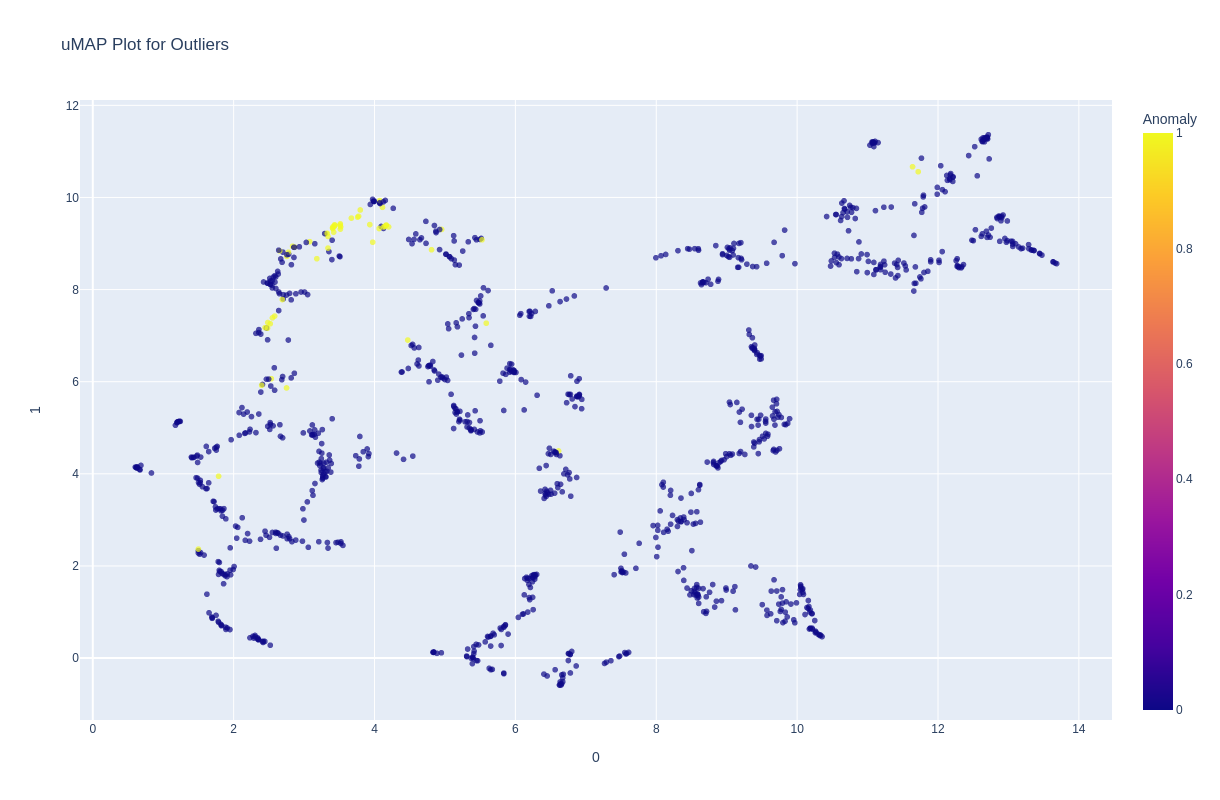

In [70]:
# plot_model(iforest, plot = 'tsne')
plot_model(iforest, plot = 'umap')

In [59]:
# svm model
svm = create_model('svm')
svm_predictions = predict_model(model = svm, data = data_unseen)
svm_predictions.head()
print(svm_predictions)
    
svm_results = assign_model(svm)
svm_results.head()

OCSVM(cache_size=200, coef0=0.0, contamination=0.05, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)
        0      1      2      3      4      5      6      7      8      9  \
0    49.0   49.0   49.0   10.0   49.0   49.0   49.0   49.0   49.0   49.0   
1    60.0   62.0   60.0   62.0   32.0   32.0   32.0   32.0   32.0   60.0   
2   110.0  116.0   32.0   10.0   32.0   32.0   32.0   32.0   32.0   82.0   
3    93.0  115.0   32.0   83.0   47.0   47.0   47.0  114.0   84.0  115.0   
4   111.0  116.0   32.0  105.0  103.0  103.0  103.0  111.0  101.0  101.0   
5    10.0   32.0  118.0  103.0   32.0   32.0   32.0   70.0   32.0  105.0   
6    97.0   97.0   32.0   61.0  116.0  116.0  116.0   83.0   32.0  115.0   
7    32.0  112.0   32.0   34.0   77.0   77.0   77.0  105.0   32.0  111.0   
8    10.0  111.0   58.0   60.0   32.0   32.0   32.0   62.0   84.0   32.0   
9    48.0  103.0   41.0   32.0  101.0  101.0  101.0  112.0   32.0   32.0   
10  

,0,1,2,3,4,5,6,7,8,9,Anomaly,Anomaly_Score
0,50.0,101.0,58.0,108.0,62.0,62.0,62.0,41.0,111.0,111.0,0,60.377149
1,116.0,32.0,32.0,32.0,53.0,53.0,53.0,32.0,62.0,32.0,0,-8.576215
2,32.0,32.0,32.0,32.0,47.0,47.0,47.0,116.0,32.0,32.0,0,-11.524944
3,49.0,99.0,32.0,32.0,121.0,121.0,121.0,32.0,32.0,32.0,0,12.394025
4,32.0,32.0,32.0,32.0,48.0,48.0,51.0,48.0,46.0,32.0,0,-38.740028


In [71]:
print(svm_predictions.iloc[4:7])
pred_rows = svm_predictions.iloc[4:7].values
pred_ints = pred_rows.astype(int)

sentence=""
for i in range(3):
    for j in range(10):
        sentence = sentence + chr(pred_ints[i][j])
        # print(chr(pred_ints[i][j]))
        
print(sentence)

       0      1      2      3      4      5      6      7      8      9  \
4  111.0  116.0   32.0  105.0  103.0  103.0  103.0  111.0  101.0  101.0   
5   10.0   32.0  118.0  103.0   32.0   32.0   32.0   70.0   32.0  105.0   
6   97.0   97.0   32.0   61.0  116.0  116.0  116.0   83.0   32.0  115.0   

   Anomaly  Anomaly_Score  
4        1      71.415170  
5        1      80.498607  
6        1      72.527316  
ot igggoee
 vg   F iaa =tttS s


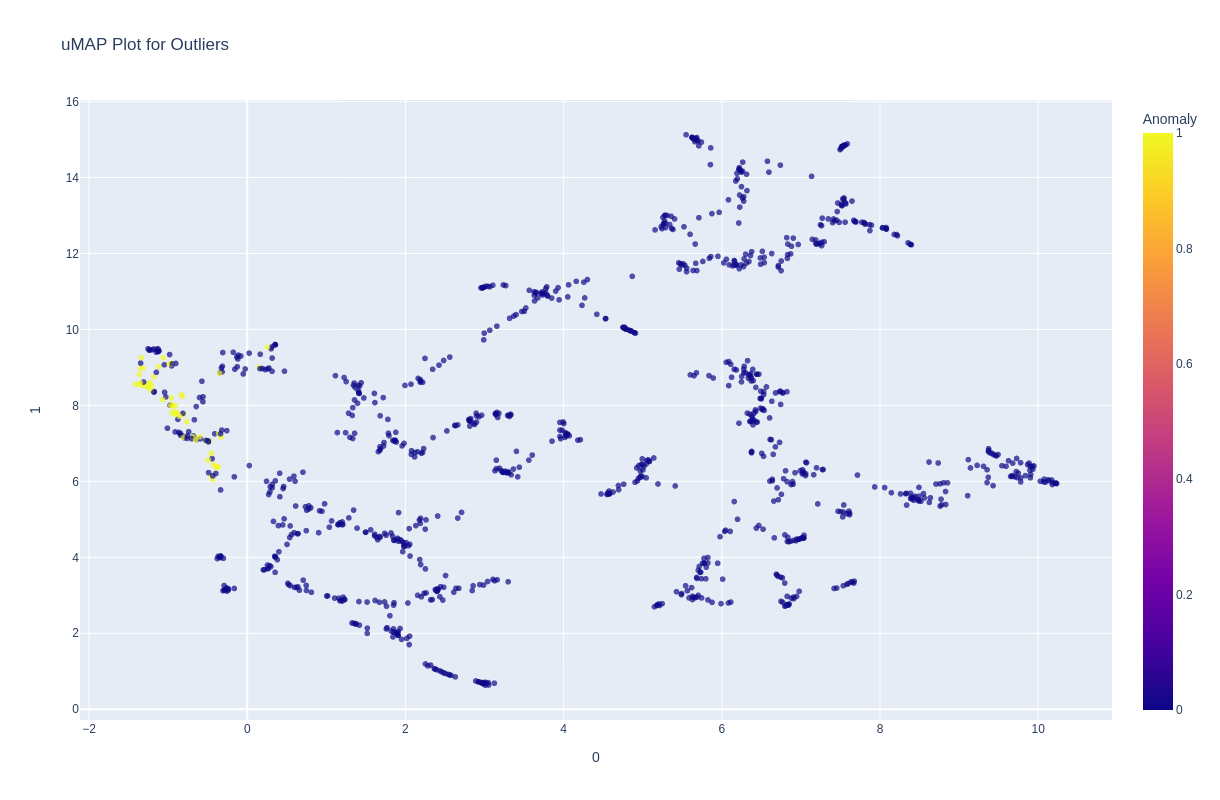

In [60]:
# plot_model(iforest, plot = 'tsne')
plot_model(svm, plot = 'umap')